# Load Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
train_df = pd.read_csv('train.csv')
train_df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


# EDA 

In [3]:
train_df = train_df.dropna()

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [5]:
train_df.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,93ee768679,Made a seamless connection to Toro Toro Quebec...,good,neutral
freq,1,1,199,11117


<AxesSubplot:xlabel='sentiment', ylabel='count'>

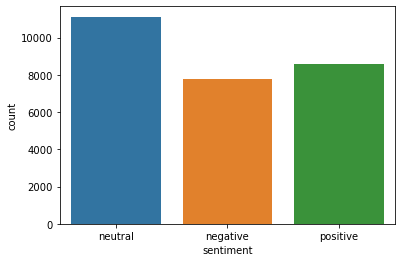

In [6]:
sns.countplot(x = train_df['sentiment'])

In [7]:
train_df['length'] = train_df['text'].apply(len)

<ipython-input-7-32249767375b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['length'] = train_df['text'].apply(len)


In [8]:
train_df

,textID,text,selected_text,sentiment,length
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46
2,088c60f138,my boss is bullying me...,bullying me,negative,25
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,77
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,122
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,111
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,27


<AxesSubplot:ylabel='Frequency'>

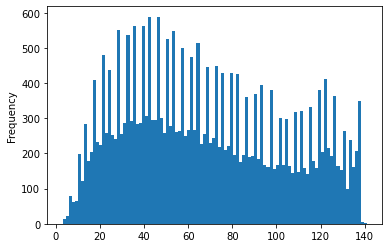

In [9]:
train_df['length'].plot(bins=100, kind='hist')

In [10]:
train_df.describe()

,length
count,27480.000000
mean,68.330022
std,35.603870
min,3.000000
25%,39.000000
50%,64.000000
75%,97.000000
max,141.000000


<AxesSubplot:xlabel='sentiment', ylabel='count'>

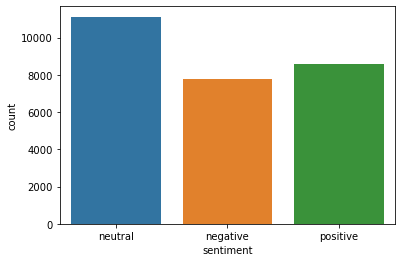

In [11]:
sns.countplot(x = train_df['sentiment'])

# Plot Word Cloud

In [12]:
positive_tweets = train_df[train_df['sentiment'] == 'positive']
positive_tweets

,textID,text,selected_text,sentiment,length
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,64
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,69
11,16fab9f95b,I really really like the song Love Story by Ta...,like,positive,56
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,interesting.,positive,135
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...","the free fillin` app on my ipod is fun, im add...",positive,51
...,...,...,...,...,...
27467,432e6de6c9,morning twit-friends! welcome to my new followers,welcome,positive,49
27474,8f14bb2715,So I get up early and I feel good about the da...,I feel good ab,positive,126
27475,b78ec00df5,enjoy ur night,enjoy,positive,16
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,111


In [13]:
negative_tweets = train_df[train_df['sentiment'] == 'negative']
negative_tweets

,textID,text,selected_text,sentiment,length
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46
2,088c60f138,my boss is bullying me...,bullying me,negative,25
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75
12,74a76f6e0a,My Sharpie is running DANGERously low on ink,DANGERously,negative,44
...,...,...,...,...,...
27464,e7eecffdc8,rec game....trying not to cry...the pain is to...,breakingg,negative,108
27470,778184dff1,lol i know and haha..did you fall asleep?? o...,t bored,negative,79
27472,8f5adc47ec,http://twitpic.com/663vr - Wanted to visit the...,were too late,negative,75
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,77


In [14]:
neutral_tweets = train_df[train_df['sentiment'] == 'neutral']
neutral_tweets

,textID,text,selected_text,sentiment,length
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,92
7,50e14c0bb8,Soooo high,Soooo high,neutral,10
8,e050245fbd,Both of you,Both of you,neutral,12
10,2339a9b08b,"as much as i love to be hopeful, i reckon the...","as much as i love to be hopeful, i reckon the ...",neutral,107
...,...,...,...,...,...
27468,a753a93e45,"few grilled mushrooms and olives, feta cheese ...","few grilled mushrooms and olives, feta cheese ...",neutral,101
27469,ac92790d8b,94 more days till BH comes back to LA,94 more days till BH comes back to LA,neutral,37
27471,15bb120f57,"i`m defying gravity. and nobody in alll of oz,...","i`m defying gravity. and nobody in alll of oz,...",neutral,106
27473,a208770a32,in spoke to you yesterday and u didnt respond...,in spoke to you yesterday and u didnt respond ...,neutral,67


In [15]:
positive_string = "".join(positive_tweets['text'].tolist())

In [16]:
negative_string = "".join(negative_tweets['text'].tolist()) 

In [17]:
neutral_string = "".join(neutral_tweets['text'].tolist()) 

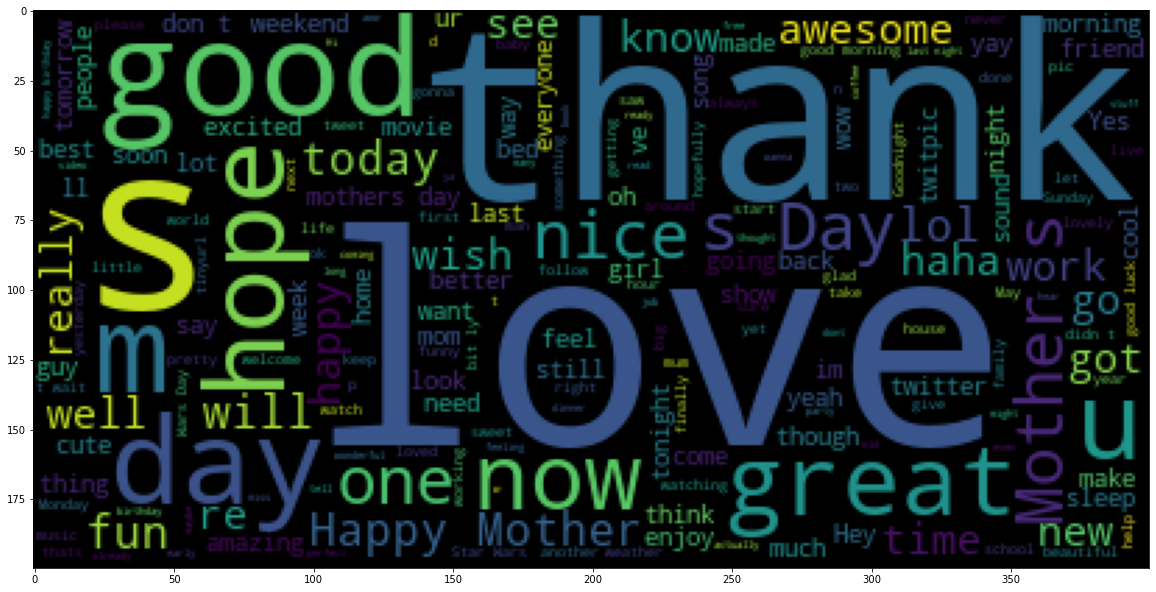

In [18]:
from wordcloud import WordCloud

plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(positive_string))

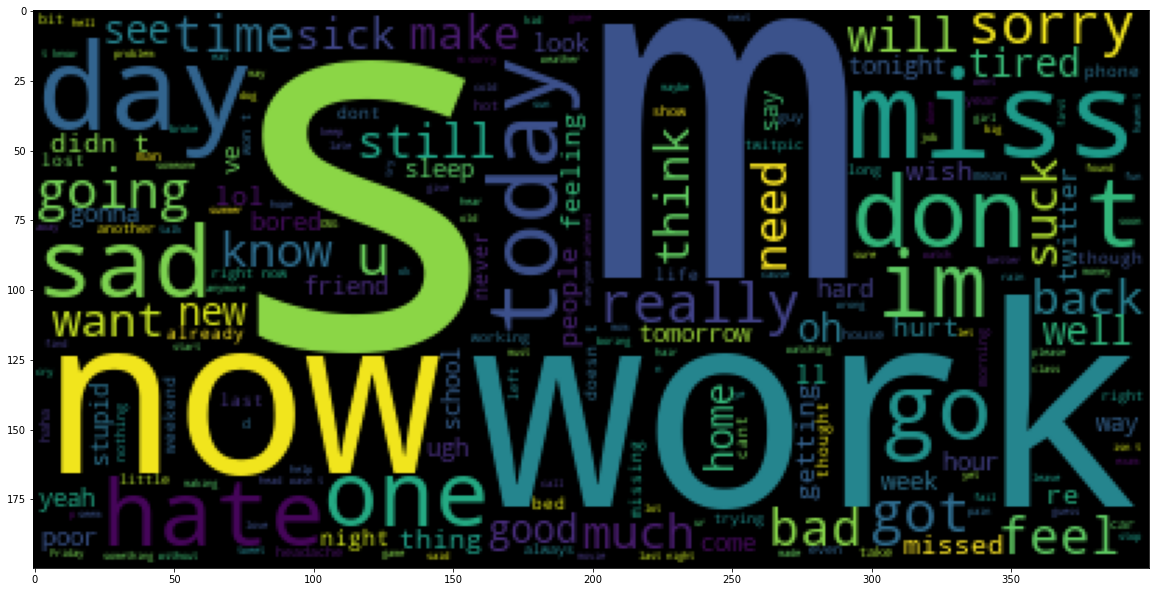

In [19]:
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(negative_string))

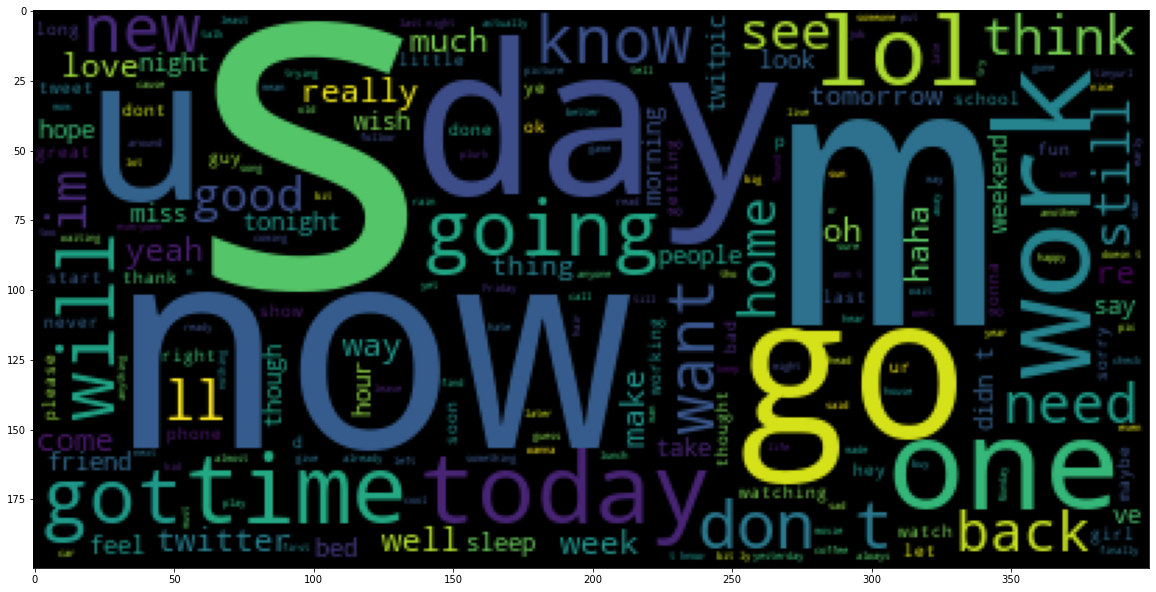

In [20]:
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(neutral_string))

# Data Cleaning

In [21]:
import string

import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
def message_cleaning(message):
    message_punctuation_removed = "".join([char for char in message if char not in string.punctuation])
    message_punctuation_removed_join_clean = [word for word in message_punctuation_removed.split() if word.lower() not in stopwords.words('english')]
    return " ".join(message_punctuation_removed_join_clean)

In [23]:
train_df_clean = train_df['text'].apply(message_cleaning)

In [24]:
print(train_df['text'][5])

http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth


In [25]:
print(train_df_clean[5])

httpwwwdothebouncycomsmf shameless plugging best Rangers forum earth


In [26]:
train_df_clean

0                                       Id responded going
1                                  Sooo SAD miss San Diego
2                                            boss bullying
3                                    interview leave alone
4                 Sons couldnt put releases already bought
                               ...                        
27476    wish could come see u Denver husband lost job ...
27477    Ive wondered rake client made clear NET dont f...
27478    Yay good Enjoy break probably need hectic week...
27479                                                worth
27480                   flirting going ATG smiles Yay hugs
Name: text, Length: 27480, dtype: object

# Encoding

## Index-Based Encoding

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
train_df_clean

In [ ]:
max_padding_length = max(train_df_clean.apply(lambda x: len(x.split())))
print("Max padding length - {}".format(max_padding_length))

In [ ]:
tokens = set([word for sentence in train_df_clean for word in sentence.split()])
word_to_idx = {token:idx+1 for idx, token in enumerate(tokens)}
print(len(word_to_idx))

In [ ]:
word_to_idx["Id"], word_to_idx["responded"], word_to_idx["going"]

In [ ]:
tweets_index_based = np.array([[word_to_idx[token] for token in sentence.split()] for sentence in train_df_clean], dtype=object)

In [ ]:
tweets_index_based_padded = pad_sequences(tweets_index_based, padding="post")
pd_tweets_index_based = pd.DataFrame(tweets_index_based_padded) 
pd_tweets_index_based

## One-Hot Encoding

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=5000)
tweets_count_vectorizer = count_vectorizer.fit_transform(train_df_clean)

In [ ]:
tweets_count_vectorizer.shape

In [ ]:
pd_tweets_count = pd.DataFrame(tweets_count_vectorizer.toarray())
pd_tweets_count

## TF-IDF Encoding

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tweets_tfidf_vectorizer = tfidf_vectorizer.fit_transform(train_df_clean)

In [110]:
tweets_tfidf_vectorizer.shape

(27480, 5000)

In [111]:
pd_tweets_tfidf = pd.DataFrame(tweets_tfidf_vectorizer.toarray())
pd_tweets_tfidf

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# ML Models

## Models with Index-Based Encoding

In [ ]:
from sklearn.model_selection import train_test_split

X = pd_tweets_index_based
y = train_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

In [116]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [ ]:
print(classification_report(y_test, y_predict_test))

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, cmap='Blues', fmt='g')

print(classification_report(y_test, y_pred))

## Models with One-Hot Encoding

In [ ]:
from sklearn.model_selection import train_test_split

X = pd_tweets_count
y = train_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
X_train

### Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [ ]:
print(classification_report(y_test, y_predict_test))

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, cmap='Blues', fmt='g')

print(classification_report(y_test, y_pred))

### Gradient Boosting Classifer

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, cmap='Blues', fmt='g')

print(classification_report(y_test, y_pred))

## Models with TF-IDT Encoding

In [137]:
from sklearn.model_selection import train_test_split

X = pd_tweets_tfidf
y = train_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Naive Bayes Model

In [139]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<AxesSubplot:>

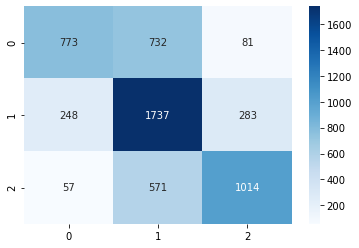

In [140]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [141]:
y_predict_test

array(['negative', 'neutral', 'neutral', ..., 'positive', 'positive',
       'positive'], dtype='<U8')

In [142]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

    negative       0.72      0.49      0.58      1586
     neutral       0.57      0.77      0.65      2268
    positive       0.74      0.62      0.67      1642

    accuracy                           0.64      5496
   macro avg       0.67      0.62      0.64      5496
weighted avg       0.66      0.64      0.64      5496



### Logistic Regression

In [143]:
y_train

0         neutral
1        negative
2        negative
3        negative
4        negative
           ...   
21980    negative
21981     neutral
21982    negative
21983    positive
21984     neutral
Name: sentiment, Length: 21984, dtype: object

C:\Users\Tong\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.72      0.57      0.64      1586
     neutral       0.63      0.76      0.69      2268
    positive       0.77      0.69      0.73      1642

    accuracy                           0.69      5496
   macro avg       0.71      0.68      0.69      5496
weighted avg       0.70      0.69      0.69      5496



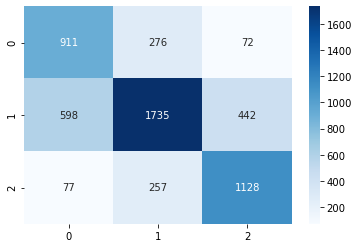

In [144]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, cmap='Blues', fmt='g')

print(classification_report(y_test, y_pred))

### Gradient Boosting Classifer

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, cmap='Blues', fmt='g')

print(classification_report(y_test, y_pred))

# DL Models

In [77]:
def plot_history(history):
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.xticks(range(0, len(history['loss'] + 1)))
    plt.plot(history['loss'], label="training", marker='o')
    plt.plot(history['val_loss'], label="validation", marker='o')
    plt.legend()
    plt.show()

## Encoding

In [60]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocabulary_size = 5000

In [61]:
def get_tweets_index_based_with_vocabulary_size(df, vocabulary_size=5000):
    from collections import defaultdict
    word_count = defaultdict(int)
    for sentence in df:
        for word in sentence.split():
            word_count[word] += 1
    word_count_list = sorted(word_count.items(), key=lambda kv: kv[1], reverse=True)
    word_count_list = word_count_list[:5000]
    
    word_count = defaultdict(int)
    for k, v in word_count_list:
        word_count[k] = v
    
    tokens =set(word_count.keys())
    word_to_idx = {token:idx+1 for idx, token in enumerate(tokens)}
    
    tweets_index_based = np.array([[word_to_idx[token] if token in word_to_idx else 0 for token in sentence.split()] for sentence in train_df_clean], dtype=object)

    tweets_index_based_padded = pad_sequences(tweets_index_based, padding="post")
    pd_tweets_index_based = pd.DataFrame(tweets_index_based_padded) 
    return pd_tweets_index_based

In [62]:
pd_tweets_index_based = get_tweets_index_based_with_vocabulary_size(train_df_clean, vocabulary_size)
pd_tweets_index_based

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3048,0,577,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3742,3422,3539,2020,4840,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,637,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,699,1110,4165,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1235,4873,0,594,4019,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27475,4581,2855,4760,2753,3196,4420,4294,156,3680,2841,...,0,0,0,0,0,0,0,0,0,0
27476,379,0,0,939,4798,1945,0,4109,3627,0,...,0,0,0,0,0,0,0,0,0,0
27477,4271,1159,483,818,3090,1815,1794,356,3787,2793,...,0,0,0,0,0,0,0,0,0,0
27478,1902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Embedded Deep Learning

In [121]:
import tensorflow as tf

In [122]:
from sklearn.model_selection import train_test_split

X = pd_tweets_index_based
y = pd.get_dummies(train_df['sentiment']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [123]:
def build_embeddings_model(average_over_positions=False, vocab_size=vocabulary_size + 1, sequence_length=25, embedding_dim=4):
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        input_length=sequence_length)
    )
    
    if average_over_positions:
        model.add(tf.keras.layers.GlobalAveragePooling1D())
    else:
        model.add(tf.keras.layers.Flatten())
        
    model.add(tf.keras.layers.Dense(
        units = 3,
        activation='sigmoid'
    ))
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

In [124]:
model = build_embeddings_model(average_over_positions=True,
                               vocab_size=vocabulary_size + 1,
                               sequence_length=25,
                               embedding_dim=8)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 8)             40008     
                                                                 
 global_average_pooling1d (G  (None, 8)                0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 3)                 27        
                                                                 
Total params: 40,035
Trainable params: 40,035
Non-trainable params: 0
_________________________________________________________________


In [125]:
print(X_train.shape)
print(y_train.shape)

(21984, 25)
(21984, 3)


Epoch 1/5
310/310 [==============================] - 1s 2ms/step - loss: 1.0810 - accuracy: 0.3951 - val_loss: 1.0728 - val_accuracy: 0.3965
Epoch 2/5
310/310 [==============================] - 1s 2ms/step - loss: 1.0488 - accuracy: 0.4214 - val_loss: 1.0367 - val_accuracy: 0.4338
Epoch 3/5
310/310 [==============================] - 1s 2ms/step - loss: 0.9978 - accuracy: 0.4956 - val_loss: 0.9853 - val_accuracy: 0.5052
Epoch 4/5
310/310 [==============================] - 1s 2ms/step - loss: 0.9389 - accuracy: 0.5735 - val_loss: 0.9367 - val_accuracy: 0.5621
Epoch 5/5
310/310 [==============================] - 1s 2ms/step - loss: 0.8840 - accuracy: 0.6272 - val_loss: 0.8960 - val_accuracy: 0.5898


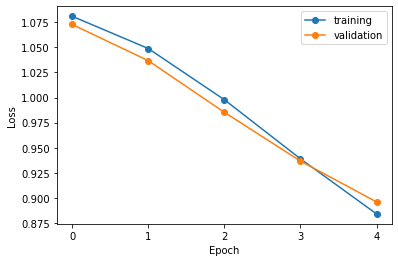

In [126]:
history = model.fit(
    x = X_train,
    y = y_train,
    epochs = 5,
    batch_size = 64,
    validation_split=0.1,
    verbose = 1
)

history = pd.DataFrame(history.history)
plot_history(history)

In [127]:
predictions = np.argmax(model.predict(X_test), axis=-1)

172/172 [==============================] - 0s 911us/step


In [128]:
predictions

array([0, 1, 2, ..., 2, 1, 1], dtype=int64)

In [132]:
labels = np.argmax(y_test,axis=-1)

<AxesSubplot:>

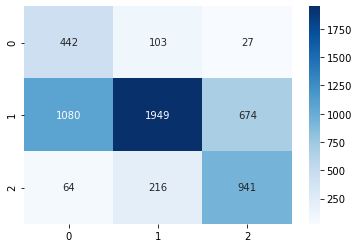

In [134]:
cm = confusion_matrix(predictions, labels)
sns.heatmap(cm, annot = True, cmap='Blues', fmt='g')

In [135]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

           0       0.28      0.77      0.41       572
           1       0.86      0.53      0.65      3703
           2       0.57      0.77      0.66      1221

    accuracy                           0.61      5496
   macro avg       0.57      0.69      0.57      5496
weighted avg       0.74      0.61      0.63      5496



### Classification with RNN

In [157]:
train_df_clean.values

array(['Id responded going', 'Sooo SAD miss San Diego', 'boss bullying',
       ...,
       'Yay good Enjoy break probably need hectic weekend Take care hun xxxx',
       'worth', 'flirting going ATG smiles Yay hugs'], dtype=object)

In [158]:
from sklearn.model_selection import train_test_split

X = train_df_clean.values
y = pd.get_dummies(train_df['sentiment']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [159]:
print(X_train)
print(len(X_train))
print(y_train)
print(len(y_train))

['Id responded going' 'Sooo SAD miss San Diego' 'boss bullying' ...
 'im sorry people rude isaac get manners know better lewd'
 'enjoy fancy meals smtimes thrs joy solitude u REALLY enjoy food lk date world'
 'oh yeah love choregoraphy pantsnot much']
21984
[[0 1 0]
 [1 0 0]
 [1 0 0]
 ...
 [1 0 0]
 [0 0 1]
 [0 1 0]]
21984


In [160]:
import tensorflow as tf

VOCAB_SIZE = 5000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_df_clean.values)

In [161]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'im', 'day', 'good', 'get', 'like', 'go', 'dont',
       'love', 'work', 'today', 'going', 'got', 'cant', 'happy', 'one',
       'lol', 'time', 'know'], dtype='<U25')

In [162]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, None, 64)          320000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 394,499
Trainable params: 394,499
Non-tr

In [163]:
model.compile(loss='categorical_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy'])

Epoch 1/5
310/310 [==============================] - 17s 32ms/step - loss: 0.8739 - accuracy: 0.5942 - val_loss: 0.7363 - val_accuracy: 0.6935
Epoch 2/5
310/310 [==============================] - 7s 24ms/step - loss: 0.6461 - accuracy: 0.7381 - val_loss: 0.7288 - val_accuracy: 0.6940
Epoch 3/5
310/310 [==============================] - 8s 25ms/step - loss: 0.5655 - accuracy: 0.7764 - val_loss: 0.7428 - val_accuracy: 0.6889
Epoch 4/5
310/310 [==============================] - 9s 29ms/step - loss: 0.5144 - accuracy: 0.8015 - val_loss: 0.7822 - val_accuracy: 0.6880
Epoch 5/5
310/310 [==============================] - 9s 28ms/step - loss: 0.4656 - accuracy: 0.8243 - val_loss: 0.8273 - val_accuracy: 0.6744


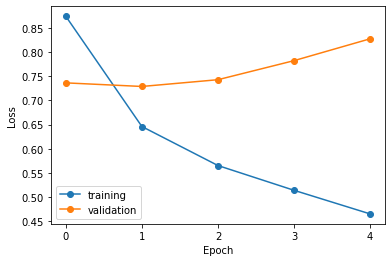

In [164]:
history = model.fit(
    x = X_train,
    y = y_train,
    epochs = 5,
    batch_size = 64,
    validation_split=0.1,
    verbose = 1
)

history = pd.DataFrame(history.history)
plot_history(history)

In [165]:
predictions = np.argmax(model.predict(X_test), axis=-1)

172/172 [==============================] - 3s 5ms/step


In [166]:
predictions

array([0, 1, 1, ..., 2, 2, 2], dtype=int64)

In [167]:
labels = np.argmax(y_test,axis=-1)

<AxesSubplot:>

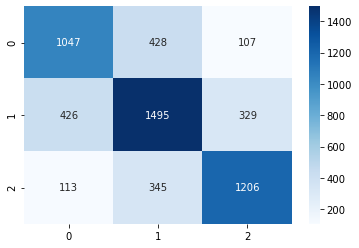

In [168]:
cm = confusion_matrix(predictions, labels)
sns.heatmap(cm, annot = True, cmap='Blues', fmt='g')

In [169]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      1582
           1       0.66      0.66      0.66      2250
           2       0.73      0.72      0.73      1664

    accuracy                           0.68      5496
   macro avg       0.68      0.68      0.68      5496
weighted avg       0.68      0.68      0.68      5496

